In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv('AppleStore.csv')
df

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9
4,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45
5,6,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,Games,47,1
6,7,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,Finance,37,19
7,8,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,Music,37,1
8,9,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,Utilities,37,1
9,10,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,Games,38,10


In [10]:
def visualizer(x, y, plot_type, title, xlabel, ylabel, rotation=False, rotation_value=60, figsize=(15,8)):
    plt.figure(figsize=figsize)
    
    if plot_type == "bar":  
        sns.barplot(x=x, y=y)
    elif plot_type == "count":  
        sns.countplot(x)
    elif plot_type == "reg":  
        sns.regplot(x=x,y=y)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.yticks(fontsize=13)
    if rotation == True:
        plt.xticks(fontsize=13,rotation=rotation_value)
    plt.show()

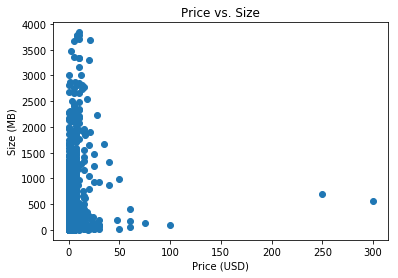

In [5]:
plt.scatter(df.price, df.size_bytes / (1024 ** 2))

plt.title('Price vs. Size')
plt.xlabel('Price (USD)')
plt.ylabel('Size (MB)')

plt.show()

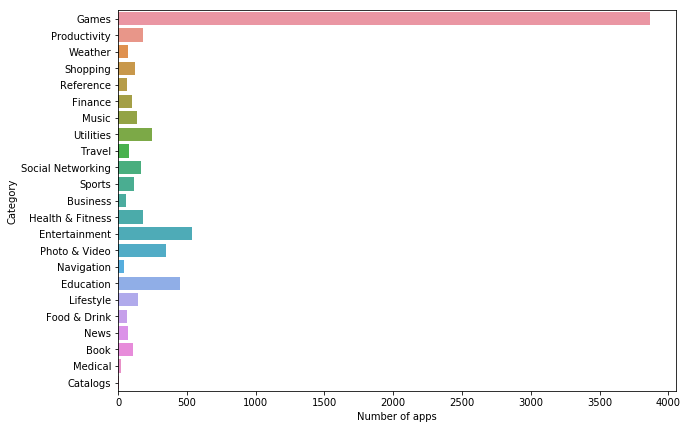

In [6]:
#Number of apps in each category

plt.figure(figsize=(10, 7))
ax = sns.countplot(y=df.prime_genre)
ax.set(xlabel='Number of apps', ylabel='Category')
plt.show()


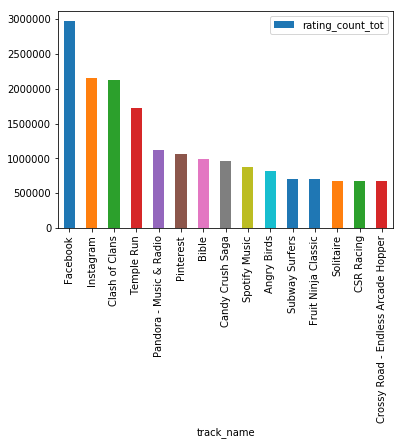

In [7]:
newdf = df.nlargest(15, ['rating_count_tot']) 
newdf
ax = plt.gca()
newdf.plot(kind='bar',x='track_name',y='rating_count_tot',ax=ax)
plt.show()

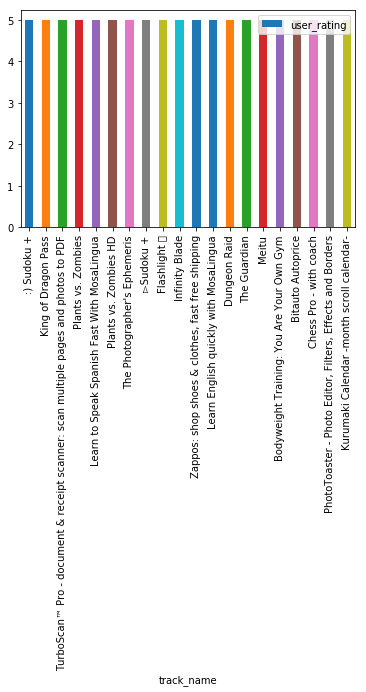

In [8]:
ratingdf = df.nlargest(20, ['user_rating']) 
ratingdf
ax = plt.gca()
ratingdf.plot(kind='bar',x='track_name',y='user_rating',ax=ax)
plt.show()

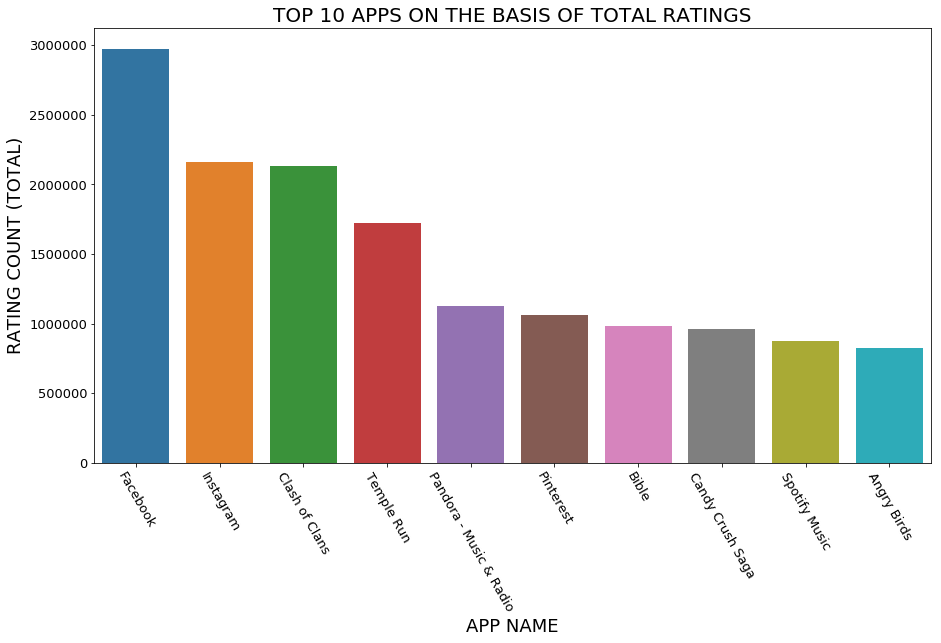

In [11]:
store_data_sorted = df.sort_values('rating_count_tot', ascending=False)
subset_store_data_sorted = store_data_sorted[:10]

visualizer(subset_store_data_sorted.track_name, subset_store_data_sorted.rating_count_tot, "bar", "TOP 10 APPS ON THE BASIS OF TOTAL RATINGS",
          "APP NAME", "RATING COUNT (TOTAL)", True, -60)

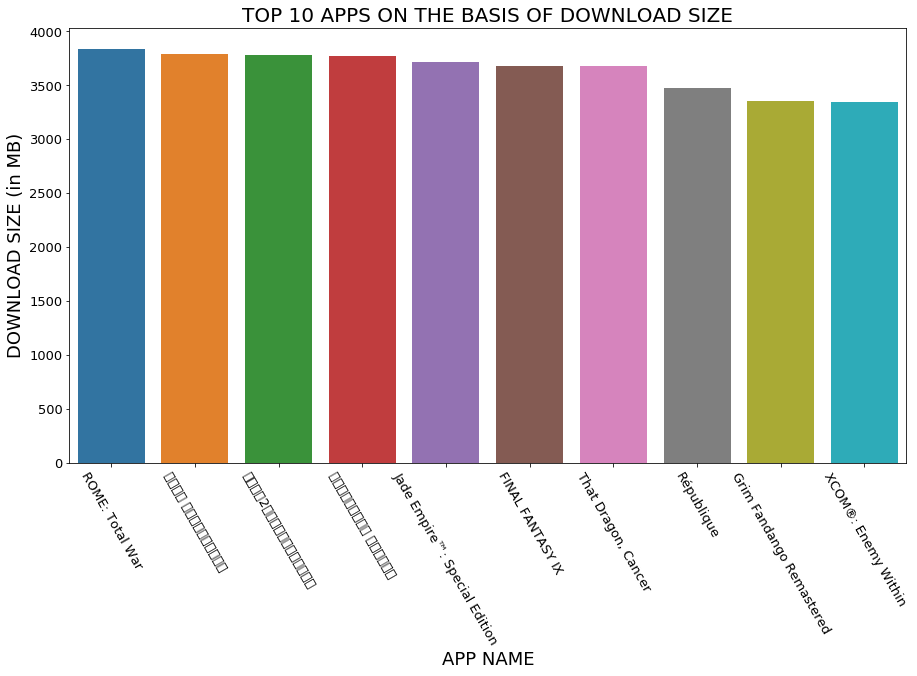

In [13]:
store_data_download = df.sort_values('size_bytes', ascending=False)
store_data_download.size_bytes /= 1024*1024 #Conversion from Bytes to MegaBytes
subset_store_data_download = store_data_download[:10]

visualizer(subset_store_data_download.track_name, subset_store_data_download.size_bytes, "bar", "TOP 10 APPS ON THE BASIS OF DOWNLOAD SIZE",
          "APP NAME", "DOWNLOAD SIZE (in MB)", True, -60)


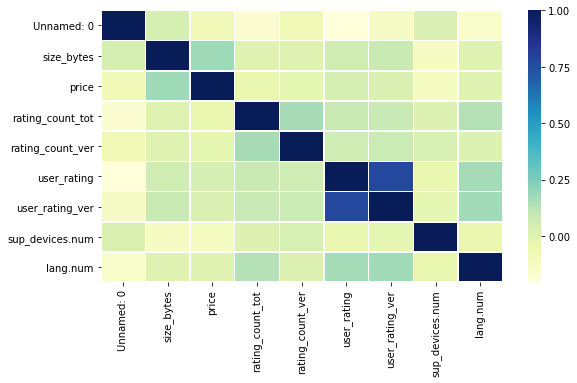

In [17]:
plt.figure(figsize=(9,5))
#df=app.iloc[:,[3,5,6,7,8,9]]
sns.heatmap(df.corr(),linewidths=.5,cmap="YlGnBu")
plt.show()

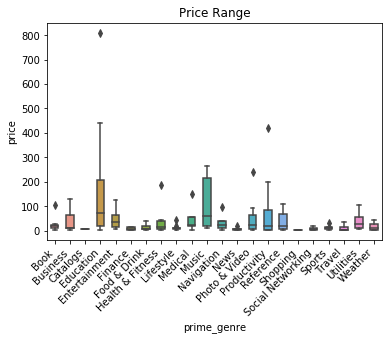

In [18]:
xyz=df[((df['price'] >0) & (df['prime_genre'] != 'Games'))].groupby(['prime_genre','user_rating'])['price'].sum().reset_index()        
#xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['prime_genre','price'],ascending=True)
sns.boxplot(x = 'prime_genre',y = 'price',data= xyz,width =0.5).set_title('Price Range')
plt.xticks(rotation=45,ha='right')
plt.show()

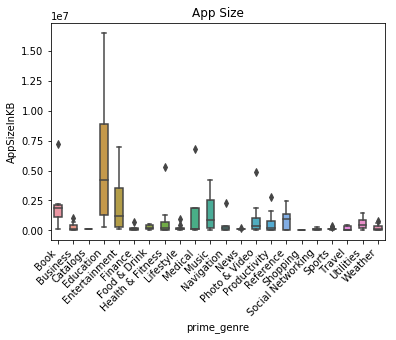

In [19]:
df['AppSizeInKB'] =df['size_bytes']/1024
xyz=df[((df['price'] >0) & (df['prime_genre'] != 'Games'))].groupby(['prime_genre','user_rating'])['AppSizeInKB'].sum().reset_index()        
#xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['prime_genre','AppSizeInKB'],ascending=True)
sns.boxplot(x = 'prime_genre',y = 'AppSizeInKB',data= xyz,width =0.5).set_title('App Size')
plt.xticks(rotation=45,ha='right')
plt.show()